In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

In [3]:
data_dict

{-1: array([[1, 7],
        [2, 8],
        [3, 8]]), 1: array([[ 5,  1],
        [ 6, -1],
        [ 7,  3]])}

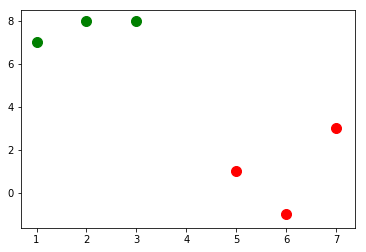

In [15]:
colors = {1:'r',-1:'g'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
[[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict]
plt.show()

In [7]:
all_data = []
for yi in data_dict:
    print('yi:', yi)
    for featureset in data_dict[yi]:
        print('featureset:', featureset)
        for feature in featureset:
            print('feature:', feature)
            all_data.append(feature)         
all_data

yi: -1
featureset: [1 7]
feature: 1
feature: 7
featureset: [2 8]
feature: 2
feature: 8
featureset: [3 8]
feature: 3
feature: 8
yi: 1
featureset: [5 1]
feature: 5
feature: 1
featureset: [ 6 -1]
feature: 6
feature: -1
featureset: [7 3]
feature: 7
feature: 3


[1, 7, 2, 8, 3, 8, 5, 1, 6, -1, 7, 3]

In [28]:
max_feature_value = max(all_data)
min_feature_value = min(all_data)
print(max_feature_value, min_feature_value)

8 -1


In [21]:
def train(data):
    # 参数字典 { ||w||: [w,b] }
    opt_dict = {}

    # 数据转换列表
    transforms = [[1,1],
                  [-1,1],
                  [-1,-1],
                  [1,-1]]

    # 从字典中获取所有数据
    all_data = []
    for yi in data:
        for featureset in data[yi]:
            for feature in featureset:
                all_data.append(feature)

    # 获取数据最大最小值
    max_feature_value = max(all_data)
    min_feature_value = min(all_data)
    all_data = None

    # 定义一个长列表
    step_sizes = [max_feature_value * 0.1,
                  max_feature_value * 0.01,
                  max_feature_value * 0.001
                  ]


    # 参数b的范围设置
    b_range_multiple = 2
    b_multiple = 5
    latest_optimum = max_feature_value*10

    # 基于不同步长训练优化
    for step in step_sizes:
        w = np.array([latest_optimum,latest_optimum])
        # 凸优化
        optimized = False
        while not optimized:
            for b in np.arange(-1*(max_feature_value*b_range_multiple),
                               max_feature_value*b_range_multiple,
                               step*b_multiple):
                for transformation in transforms:
                    w_t = w*transformation
                    found_option = True

                    for i in data:
                        for xi in data[i]:
                            yi=i
                            if not yi*(np.dot(w_t,xi)+b) >= 1:
                                found_option = False
                                # print(xi,':',yi*(np.dot(w_t,xi)+b))

                    if found_option:
                        opt_dict[np.linalg.norm(w_t)] = [w_t,b]

            if w[0] < 0:
                optimized = True
                print('Optimized a step!')
            else:
                w = w - step

        norms = sorted([n for n in opt_dict])
        #||w|| : [w,b]
        opt_choice = opt_dict[norms[0]]
        w = opt_choice[0]
        b = opt_choice[1]
        latest_optimum = opt_choice[0][0]+step*2

    for i in data:
        for xi in data[i]:
            yi=i
            print(xi,':',yi*(np.dot(w,xi)+b)) 
    return w, b
            
    
w, b = train(data_dict)

Optimized a step!
Optimized a step!
Optimized a step!
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


In [26]:
# 定义预测函数
def predict(features):
    # sign( x.w+b )
    classification = np.sign(np.dot(np.array(features),w)+b)
    if classification !=0:
        ax.scatter(features[0], features[1], s=200, marker='^', c=colors[classification])
        print(classification)
    return classification

In [27]:
predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8],
              [2,5], 
              [8,-3]]

for p in predict_us:
    predict(p)

-1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0


Optimized a step!
Optimized a step!
Optimized a step!
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


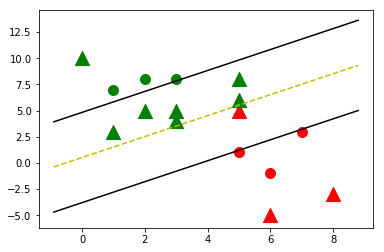

In [12]:
class Hard_Margin_SVM:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'g'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    # 定义训练函数
    def train(self, data):
        self.data = data
        # 参数字典 { ||w||: [w,b] }
        opt_dict = {}
        
        # 数据转换列表
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        
        # 从字典中获取所有数据
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        # 获取数据最大最小值
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # 定义一个学习率(步长)列表
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      self.max_feature_value * 0.001
                      ]

        
        # 参数b的范围设置
        b_range_multiple = 2
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        # 基于不同步长训练优化
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # 凸优化
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    # print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step!')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            
    
    # 定义预测函数
    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='^', c=self.colors[classification])
        return classification

    # 定义结果绘图函数
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        # 定义线性超平面
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # 正支持向量
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # 负支持向量
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # 线性分隔超平面
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()


data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Hard_Margin_SVM()
svm.train(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8],
              [2,5], 
              [8,-3]]

for p in predict_us:
    svm.predict(p)

svm.visualize()